# MAP 554 - Lab 6: Machine learning for modeling

### Objectives:
The objectives are to introduce three Machine Learning (ML) tools for regression using scikit-learn python library:
- Artificial Neuron Network
- Support Vector Regression
- Gaussian Process

and to follow the general steps of ML for regression:
- Step 1: generation of Design of Experiment
- Step 2: creation of a surrogate model
- Step 3: training of the surrogate model
- Step 4: validation of the surrogate model
- Step 5: use of the surrogate model

First 2d example using an analytical function is used to illustrate the different steps.

Then, the idea is to experiment with different settings for the surrogate models on this analytical test case.

Finally, an aerospace design modeling problem is carried out in MAP 554 - Lab 7

In this Lab6, two pakages are mainly used:
 

*   the package `Scikit-learn` for the Machine Learning models, the documentation is available at [Scikit-learn](https://scikit-learn.org/stable/)
*   the package `PyDoE` for the Design of Experiments, the documentation is available at [PyDoE documentation](https://pythonhosted.org/pyDOE/) 



In [1]:
# Support for maths
import numpy as np

# Plotting tools
from IPython.display import HTML, display
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Machine learning library
import sklearn

# Install PyDoE package for design of experiment
#!pip install pyDOE2

from pyDOE2 import lhs

In [2]:
# Definition of the 2D Branin function as an unknown exact function

def Branin(z):
  z1 = z[0]
  z2 = z[1]
  a = 1.
  b = 5.1/(4*np.pi**2)
  c = 5./np.pi
  r = 6.
  s= 10.
  t = 1./(8.*np.pi)

  y = a*(z2-b*z1**2+c*z1-r)**2+s*(1-t)*np.cos(z1)+s
  return y


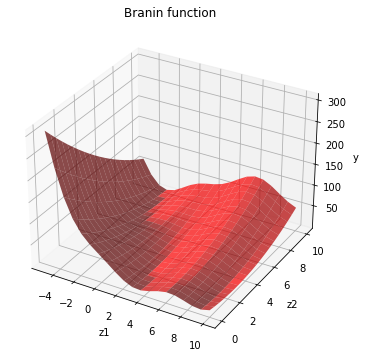

In [3]:
# Plot of the 3D function to visualize
z1min = -5.
z1max = 10.

z2min = 0.
z2max = 10.

Nb_pt = 20
Z1,Z2 = np.meshgrid(np.linspace(z1min,z1max,Nb_pt), np.linspace(z2min,z2max,Nb_pt))
Z11 = Z1.reshape((1,Nb_pt**2))
Z22 = Z2.reshape((1,Nb_pt**2))

Z_plot_ = np.concatenate((Z11,Z22)).T


y_branin = np.zeros(len(Z_plot_))
for i in range(len(Z_plot_)):
    y_branin[i] = Branin(np.array([Z_plot_[i,0],Z_plot_[i,1]]))

y_branin = y_branin.reshape(Nb_pt, Nb_pt)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
plt.title('Branin function')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.7)
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')

display(HTML("""<style>#output-body {display: flex; align-items: center;justify-content: center;}</style>"""))  #to plot at the center of the page

###  <font color='red'>Step 1</font> : generation of the design of experiment

Consider the unknown 2d Branin function $f:\mathbb{R}^2 \rightarrow \mathbb{R}$, the step 1 consists in defining a set of data (DoE) of size $M$, $\mathcal{Z}_M=\left\{ \mathbf{z}_{(1)}, \ldots , \mathbf{z}_{(M)} \right\}$ the input data set ($z_1\in [-5.,10] $ and $z_2 \in [0. 10]$) and the corresponding exact function responses $\mathcal{Y}_M= \left\{y_{(1)}=f\left(\mathbf{z}_{(1)}\right),\ldots, \right.$ $\left. y_{(M)}=f\left(\mathbf{z}_{(M)}\right) \right\}$.

We use Latin Square Hypercube (LHS) sampling method of `PyDoE`.
Assuming $M=20$:

In [4]:
input_dim = 2
M = 20
Z_M = lhs(input_dim,M) # using pyDOE2
print(Z_M)  #it corresponds to a DoE of 20 samples of dimension 2 but between 0. and 1.

[[0.5172908  0.97957853]
 [0.08611905 0.86116647]
 [0.95450282 0.9470165 ]
 [0.69809633 0.65575085]
 [0.3576542  0.70798789]
 [0.40025074 0.09728675]
 [0.90628684 0.76097322]
 [0.21047858 0.64968661]
 [0.79914117 0.43962509]
 [0.0306545  0.26480521]
 [0.29564053 0.50634078]
 [0.6174217  0.16380922]
 [0.16860501 0.37226807]
 [0.48697413 0.21898786]
 [0.70829891 0.80155073]
 [0.58926854 0.14589259]
 [0.83979644 0.58630638]
 [0.11781762 0.03692755]
 [0.85690173 0.34575005]
 [0.34142877 0.45378984]]


In [5]:
# Projection into the input design space
z1min = -5.
z1max = 10.

z2min = 0.
z2max = 10.

Z_M_denorm = Z_M
Z_M_denorm[:,0] = z1min + (z1max-z1min)*Z_M[:,0]
Z_M_denorm[:,1] = z2min + (z2max-z2min)*Z_M[:,1]
print(Z_M_denorm) #it is the DoE into the design space

[[ 2.75936194  9.79578527]
 [-3.70821421  8.61166473]
 [ 9.31754226  9.47016503]
 [ 5.47144493  6.55750849]
 [ 0.36481305  7.07987891]
 [ 1.00376108  0.9728675 ]
 [ 8.59430255  7.60973218]
 [-1.84282133  6.49686613]
 [ 6.98711753  4.3962509 ]
 [-4.5401825   2.64805205]
 [-0.56539206  5.06340779]
 [ 4.26132549  1.63809217]
 [-2.47092482  3.72268073]
 [ 2.304612    2.18987856]
 [ 5.62448369  8.01550726]
 [ 3.83902812  1.45892594]
 [ 7.59694663  5.86306383]
 [-3.23273571  0.36927546]
 [ 7.85352588  3.45750051]
 [ 0.12143159  4.53789842]]


In [6]:
def create_DOE(input_dim, nb_points):
    Z_M = lhs(input_dim,M) # using pyDOE2
    z1min = -5.
    z1max = 10.

    z2min = 0.
    z2max = 10.

    Z_M_denorm = Z_M
    Z_M_denorm[:,0] = z1min + (z1max-z1min)*Z_M[:,0]
    Z_M_denorm[:,1] = z2min + (z2max-z2min)*Z_M[:,1]
    return(Z_M_denorm) #it is the DoE into the design space

def evaluate_Branin(Z_DoE):
    y_M = np.zeros((len(Z_DoE),1))
    for i in range(len(Z_DoE)):
      y_M[i] = Branin(Z_DoE[i,:])
    return y_M

In [7]:
## Evaluation of the "unknown" exact Branin function
y_M = np.zeros((len(Z_M_denorm),1))
for i in range(len(Z_M_denorm)):
  y_M[i] = Branin(Z_M_denorm[i,:])

print(y_M) #it corresponds to the exact function outputs

[[ 52.98592266]
 [ 27.56832606]
 [ 50.6380138 ]
 [ 45.74935467]
 [ 21.67064999]
 [ 27.82947493]
 [ 36.54147501]
 [ 15.68446582]
 [ 27.6227316 ]
 [183.67303739]
 [ 21.63371789]
 [  5.81974775]
 [ 51.4587464 ]
 [  4.25554603]
 [ 64.93344972]
 [  2.75229122]
 [ 32.67548895]
 [147.47364793]
 [ 13.96029808]
 [ 21.1461905 ]]


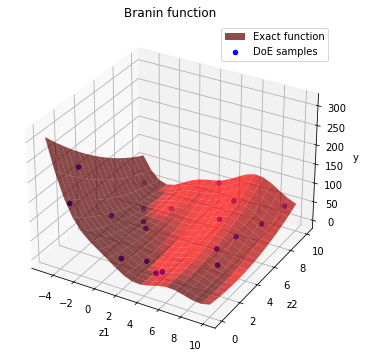

In [8]:
fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
plt.title('Branin function')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.7,label='Exact function')
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
ax.scatter(Z_M_denorm[:,0],Z_M_denorm[:,1],y_M, c='b', marker='o',label = 'DoE samples')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')
plt.legend()

display(HTML("""<style>#output-body {display: flex; align-items: center;justify-content: center;}</style>"""))

### <font color='red'>Step 2</font> : creation of a surrogate model using the Python library Scikit-learn

#### <font color='blue'> Creation of a Artificial Neural Network: Multi-Layer Perceptron (MLP)</font>  

MLPRegressor() method in `Scikit-learn` enables to construct such a MLP [MLP documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html?highlight=mlp#sklearn.neural_network.MLPRegressor)

MPL architecture choices:

*   2 hidden layer MLP, the parameter *hidden_layer_sizes* defines the number of layer (and the number of units per layer)
*   10 units per layer
*   ReLu the rectified linear unit activation function defined by the parameter *activation* 
*  optimization algorithm: '*adam*' defined by parameter *solver*

In [9]:
from sklearn.neural_network import MLPRegressor

nb_unit = 10
regr_MLP = MLPRegressor(hidden_layer_sizes = (nb_unit,nb_unit), activation='relu',
                    solver='adam',max_iter=5000)

#### <font color='blue'> Creation of a Support Vector Regression (SVR)

SVR() method in `Scikit-learn` enables to construct such a SVR [SVR documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html?highlight=svr#sklearn.svm.SVR)

SVR architecture choices:

*   kernel choice: "RBF" using the parameter *kernel*
*   Optimization problem settings :

 - Regularization parameter C
 - Epsilon in the epsilon-SVR model

In [10]:
from sklearn.svm import SVR

regr_SVR = SVR(kernel='rbf',C=1e6,tol=1e-6,epsilon=0.1)

#### <font color='blue'> Creation of a Gaussian Process (GP)

GaussianProcessRegressor() method in `Scikit-learn` enables to construct such a GP  [GP documentation](https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.GaussianProcessRegressor.html#sklearn.gaussian_process.GaussianProcessRegressor)

GP architecture choices:

*   kernel choice: "Matern" using the parameter *kernel*
*   Optimization problem settings :

 - Optimizer algorithm: *fmin_l_bfgs_b* using parameter *optimizer*
 - Number of restart in optimizer: usign parameter *n_restarts_optimizer*

In [11]:
from sklearn.gaussian_process.kernels import RBF,Matern
from sklearn.gaussian_process import GaussianProcessRegressor

kernel = 1.0*Matern(length_scale=1.0, nu=1.5)
regr_GP = GaussianProcessRegressor(kernel=kernel,random_state=0,
                                   optimizer='fmin_l_bfgs_b',
                                   n_restarts_optimizer=10)


###  <font color='red'>Step 3</font> : training of the surrogate models

All the created surrogate models are trained using a simple *.fit()* method
It runs the associated optimization algorithms to each surrogate model training technique.





In [12]:
regr_MLP.fit(Z_M_denorm,y_M)  # Training of the MLP

regr_SVR.fit(Z_M_denorm,y_M)  # Training of the SVR

regr_GP.fit(Z_M_denorm,y_M)  # Training of the GP

GaussianProcessRegressor(kernel=1**2 * Matern(length_scale=1, nu=1.5),
                         n_restarts_optimizer=10, random_state=0)

###  <font color='red'>Step 4</font> : validation of the surrogate models

For this example (in which the exact function is computationally "free" to evaluate), a test set of size M_t=500 samples is defined in order to compare the different surrogate models

In [13]:
input_dim = 2
M_t = 500
Z_test = lhs(input_dim,M_t)

z1min = -5.
z1max = 10.
z2min = 0.
z2max = 10.

Z_test_denorm = Z_test
Z_test_denorm[:,0] = z1min + (z1max-z1min)*Z_test[:,0]
Z_test_denorm[:,1] = z2min + (z2max-z2min)*Z_test[:,1]

## Evaluation of the "unknown" exact Branin function
y_test = np.zeros((len(Z_test_denorm),1))
for i in range(len(Z_test_denorm)):
  y_test[i] = Branin(Z_test_denorm[i,:])

In [14]:
def get_test_set(input_dim,M_t):
    Z_test = lhs(input_dim,M_t)

    z1min = -5.
    z1max = 10.
    z2min = 0.
    z2max = 10.

    Z_test_denorm = Z_test
    Z_test_denorm[:,0] = z1min + (z1max-z1min)*Z_test[:,0]
    Z_test_denorm[:,1] = z2min + (z2max-z2min)*Z_test[:,1]

    ## Evaluation of the "unknown" exact Branin function
    y_test = np.zeros((len(Z_test_denorm),1))
    for i in range(len(Z_test_denorm)):
      y_test[i] = Branin(Z_test_denorm[i,:])
    return Z_test_denorm, y_test
    

Use of the *predict()* method to evaluate the different surrogate models on the test set

In [15]:
yMLP_pred = regr_MLP.predict(Z_test_denorm) # for MLP

ySVR_pred = regr_SVR.predict(Z_test_denorm) # for SVR

yGP_pred = regr_GP.predict(Z_test_denorm) # for GP



To assess the accuracy of the different surrogate models, the Root Mean Square Error using of the surrogate model predictions and the exact function responses are estimated:

In [16]:
from sklearn.metrics import mean_squared_error

rmse_MLP = np.sqrt(mean_squared_error(y_test, yMLP_pred))
rmse_SVR = np.sqrt(mean_squared_error(y_test, ySVR_pred))
rmse_GP = np.sqrt(mean_squared_error(y_test, yGP_pred))

print('RMSE result for MLP: ',rmse_MLP)
print('RMSE result for SVR: ',rmse_SVR)
print('RMSE result for GP: ',rmse_GP)

RMSE result for MLP:  14.186969638545586
RMSE result for SVR:  7.966234425243435
RMSE result for GP:  9.088166138183954


In [17]:
def get_sqrt_MSE(y_test,y_pred):
    return np.sqrt(mean_squared_error(y_test, y_pred))


Based on the obtained value for RMSE it is possible to compare the accuracy of the surrogate model over the entire domain of definition

To visualize the obtained prediction, a plot of the exact Branin function and the approximated surrogate models is made

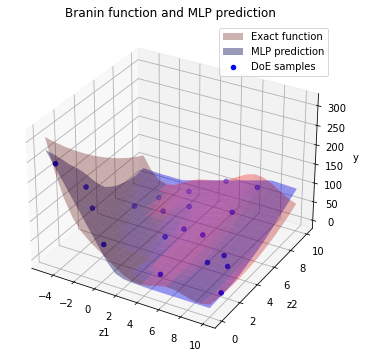

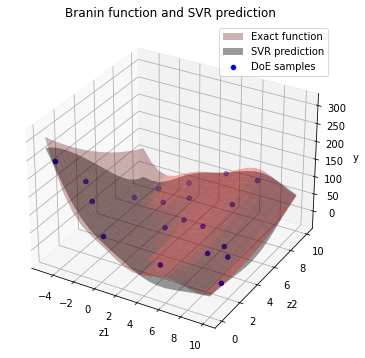

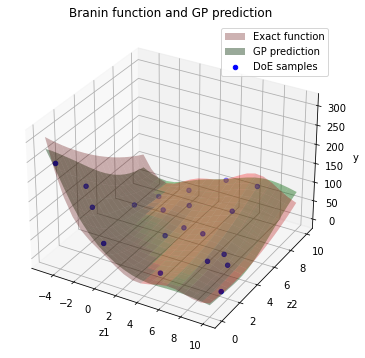

In [28]:
z1min = -5.
z1max = 10.

z2min = 0.
z2max = 10.

Nb_pt = 20
Z1,Z2 = np.meshgrid(np.linspace(z1min,z1max,Nb_pt), np.linspace(z2min,z2max,Nb_pt))
Z11 = Z1.reshape((1,Nb_pt**2))
Z22 = Z2.reshape((1,Nb_pt**2))

Z_plot_ = np.concatenate((Z11,Z22)).T


y_pred_plot_MPL = np.zeros(len(Z_plot_))
y_pred_plot_SVR = np.zeros(len(Z_plot_))
y_pred_plot_GP = np.zeros(len(Z_plot_))
for i in range(len(Z_plot_)):
    y_pred_plot_MPL[i] = regr_MLP.predict(np.array([[Z_plot_[i,0],Z_plot_[i,1]]]))
    y_pred_plot_SVR[i] = regr_SVR.predict(np.array([[Z_plot_[i,0],Z_plot_[i,1]]]))
    y_pred_plot_GP[i] = regr_GP.predict(np.array([[Z_plot_[i,0],Z_plot_[i,1]]]))

y_pred_plot_MPL = y_pred_plot_MPL.reshape(Nb_pt, Nb_pt)
y_pred_plot_SVR = y_pred_plot_SVR.reshape(Nb_pt, Nb_pt)
y_pred_plot_GP = y_pred_plot_GP.reshape(Nb_pt, Nb_pt)

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
plt.title('Branin function and MLP prediction')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.3, label='Exact function')
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
surf_MLP = ax.plot_surface(Z1, Z2, y_pred_plot_MPL, color='b', alpha=0.4, label='MLP prediction')
surf_MLP._facecolors2d=surf_MLP._facecolors3d
surf_MLP._edgecolors2d=surf_MLP._edgecolors3d
ax.scatter(Z_M_denorm[:,0],Z_M_denorm[:,1],y_M, c='b', marker='o',label = 'DoE samples')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')
plt.legend()

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
plt.title('Branin function and SVR prediction')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.3, label='Exact function')
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
surf_SVR = ax.plot_surface(Z1, Z2, y_pred_plot_SVR, color='k', alpha=0.4, label='SVR prediction')
surf_SVR._facecolors2d=surf_SVR._facecolors3d
surf_SVR._edgecolors2d=surf_SVR._edgecolors3d
ax.scatter(Z_M_denorm[:,0],Z_M_denorm[:,1],y_M, c='b', marker='o',label = 'DoE samples')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')
plt.legend()

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection = '3d')
plt.title('Branin function and GP prediction')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.3, label='Exact function')
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
surf_GP = ax.plot_surface(Z1, Z2, y_pred_plot_GP, color='g', alpha=0.4, label='GP prediction')
surf_GP._facecolors2d=surf_GP._facecolors3d
surf_GP._edgecolors2d=surf_GP._edgecolors3d
ax.scatter(Z_M_denorm[:,0],Z_M_denorm[:,1],y_M, c='b', marker='o',label = 'DoE samples')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')
plt.legend()

display(HTML("""<style>#output-body {display: flex; align-items: center;justify-content: center;}</style>"""))  #to plot at the center of the page



One of the most important aspect of GP is that in addition to provide a prediction as for the other ML models (MLP and SVR), it provides an uncertainty model associated to prediction. 

In `Scikit-learn`, it is done using the parameter *return_std=True* in the *predict()* method, which provides the standard deviation of the Normal distribution associated to the prediction in addition to the mean value of the GP.

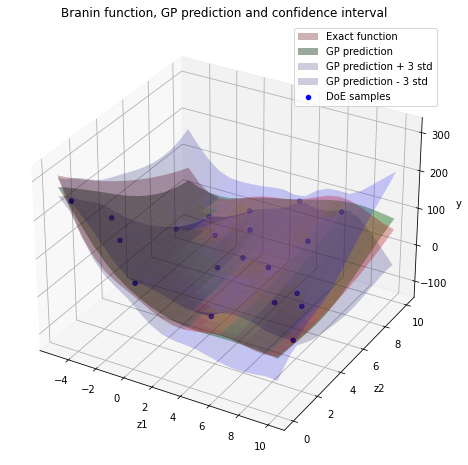

In [29]:
z1min = -5.
z1max = 10.

z2min = 0.
z2max = 10.

Nb_pt = 20
Z1,Z2 = np.meshgrid(np.linspace(z1min,z1max,Nb_pt), np.linspace(z2min,z2max,Nb_pt))
Z11 = Z1.reshape((1,Nb_pt**2))
Z22 = Z2.reshape((1,Nb_pt**2))

Z_plot_ = np.concatenate((Z11,Z22)).T


y_pred_plot_GP = np.zeros(len(Z_plot_))
y_pred_std_plot_GP = np.zeros(len(Z_plot_))
for i in range(len(Z_plot_)):
    y_pred_plot_GP[i],y_pred_std_plot_GP[i] = regr_GP.predict(np.array([[Z_plot_[i,0],Z_plot_[i,1]]]),return_std=True)

y_pred_plot_GP = y_pred_plot_GP.reshape(Nb_pt, Nb_pt)
y_pred_std_plot_GP = y_pred_std_plot_GP.reshape(Nb_pt, Nb_pt)



fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection = '3d')
plt.title('Branin function, GP prediction and confidence interval')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.3, label='Exact function')
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
surf_GP = ax.plot_surface(Z1, Z2, y_pred_plot_GP, color='g', alpha=0.4, label='GP prediction')
surf_GP._facecolors2d=surf_GP._facecolors3d
surf_GP._edgecolors2d=surf_GP._edgecolors3d
surf_GP_plusstd = ax.plot_surface(Z1, Z2, y_pred_plot_GP+3*y_pred_std_plot_GP, color='b', alpha=0.2, label='GP prediction + 3 std')
surf_GP_plusstd._facecolors2d=surf_GP_plusstd._facecolors3d
surf_GP_plusstd._edgecolors2d=surf_GP_plusstd._edgecolors3d
surf_GP_minusstd = ax.plot_surface(Z1, Z2, y_pred_plot_GP-3*y_pred_std_plot_GP, color='b', alpha=0.2, label='GP prediction - 3 std')
surf_GP_minusstd._facecolors2d=surf_GP_minusstd._facecolors3d
surf_GP_minusstd._edgecolors2d=surf_GP_minusstd._edgecolors3d
ax.scatter(Z_M_denorm[:,0],Z_M_denorm[:,1],y_M, c='b', marker='o',label = 'DoE samples')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')
plt.legend()

display(HTML("""<style>#output-body {display: flex; align-items: center;justify-content: center;}</style>"""))  #to plot at the center of the page

In the previous figure, the blue surfaces correspond to the mean GP prediction (green surface) $\pm$ 3 standard deviation, given a confidence interval (at $\sim 99$%) associated to the prediction. Based on the available DoE, the confidence interval allows to encompass the exact unknow Branin function (red surface).

It is even possible to generate trajectories of the GP using *regr_GP.sample_y()* method.

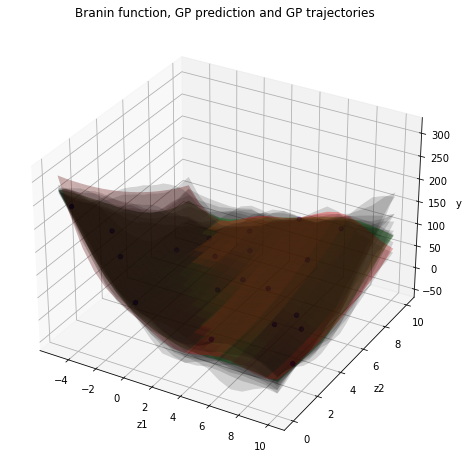

In [30]:
n_trajectories = 10
y_trajectories = regr_GP.sample_y(Z_plot_,n_trajectories)

fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection = '3d')
plt.title('Branin function, GP prediction and GP trajectories')
surf = ax.plot_surface(Z1, Z2, y_branin, color='r', alpha=0.3, label='Exact function')
surf._facecolors2d=surf._facecolors3d
surf._edgecolors2d=surf._edgecolors3d
surf_GP = ax.plot_surface(Z1, Z2, y_pred_plot_GP, color='g', alpha=0.4, label='GP prediction')
surf_GP._facecolors2d=surf_GP._facecolors3d
surf_GP._edgecolors2d=surf_GP._edgecolors3d
for i in range(n_trajectories):
  y_trajectories_ = np.reshape(y_trajectories[:,:,i],(Nb_pt,Nb_pt))
  surf_GP_traj = ax.plot_surface(Z1, Z2, y_trajectories_, color='k', alpha=0.15, label='GP trajectory')
  surf_GP_traj._facecolors2d=surf_GP_traj._facecolors3d
  surf_GP_traj._edgecolors2d=surf_GP_traj._edgecolors3d
ax.scatter(Z_M_denorm[:,0],Z_M_denorm[:,1],y_M, c='b', marker='o',label = 'DoE samples')
ax.set_xlabel('z1')
ax.set_ylabel('z2')
ax.set_zlabel('y')
#plt.legend()

display(HTML("""<style>#output-body {display: flex; align-items: center;justify-content: center;}</style>"""))  #to plot at the center of the page


In the previous figure, the black surfaces, correspond to 10 alternative possible trajectories of the GP, the green surface is the mean prediction of the GP and the red surface the exact "unknown" function

## <font color='blue'>Exercise: study of the influence of ML model settings</font>   

Based on the previous illustrations of the different steps and machine learning methods, this part is dedicated to some experimentations on different settings around the surrogate models and the ML steps.

In the following, you should evaluate the influence of several ML model settings. The objective is not to change all the settings together, but to evaluate the influence comparing the RMSE to the "standard" ML model configurations displayed in the previous sections.




    






picklepickle*  <font color='blue'>Exercise 1</font>: Number of samples in the DoE using LHS (20, 40 and 60 samples)

  The LHS process is random, therefore for two repetitions of *Z_M = lhs(input_dim,M)* the repartition of the data $Z_M$ in the design space are not the same. 
    - How is evolving the RMSE when for a same number of samples (say 20 in the DoE) the entire ML process is repeated for different LHS data repartition ?
    - How is evolving the RMSE when changing the number of samples in the DoE ?

In [33]:
## Here study the influence of the DoE
input_dim = 2
nb_points = 20
nb_test_points = 500

for k in range(3):

    Z_DoE = create_DOE(input_dim, nb_points)
    y_M = evaluate_Branin(Z_DoE)


    nb_unit = 10
    regr_MLP = MLPRegressor(hidden_layer_sizes = (nb_unit,nb_unit), activation='relu',
                        solver='adam',max_iter=5000)

    regr_MLP.fit(Z_DoE,y_M)  # Training of the MLP

    z_test, y_test=get_test_set(input_dim, nb_test_points)

    y_pred = regr_MLP.predict(z_test) # for MLP


    print("MLP error - try {} : {}".format(k+1,get_sqrt_MSE(y_test,y_pred)))

MLP error - try 1 : 13.650197945839293
MLP error - try 2 : 14.688859447046529
MLP error - try 3 : 11.760773256343395


In [35]:
L_nb_points=[10,20,40]
input_dim=2
nb_test_points=500

for nb_points in L_nb_points:
    Z_DoE = create_DOE(input_dim, nb_points)
    y_M = evaluate_Branin(Z_DoE)


    nb_unit = 10
    regr_MLP = MLPRegressor(hidden_layer_sizes = (nb_unit,nb_unit), activation='relu',
                        solver='adam',max_iter=5000)

    regr_MLP.fit(Z_DoE,y_M)  # Training of the MLP

    z_test, y_test=get_test_set(input_dim, nb_test_points)

    y_pred = regr_MLP.predict(z_test) # for MLP


    print("MLP error - {} points : {}".format(nb_points, get_sqrt_MSE(y_test,y_pred)))

MLP error - 10 points : 14.772220510919567
MLP error - 20 points : 14.60988612535145
MLP error - 40 points : 15.90490889225189


*  <font color='blue'>Exercise 2</font>: For the Artificial Neural Network:

  For the MLP, the idea is to study the influence of the MPL architecture choices 
   - Number of units (10, 50, 100)
   - Number of layers (2,3,4)
   - activation function ('relu', 'logistic', 'tanh')

  How is evolving the RMSE when changing this settings in MLP ?



In [18]:
nb_points=20
input_dim=2
nb_test_points=500
Z_DoE = create_DOE(input_dim, nb_points)
y_M = evaluate_Branin(Z_DoE)
z_test, y_test=get_test_set(input_dim, nb_test_points)

In [19]:
## Here modify the settings of MLP and study their influences on the RMSE

        
nb_units_list = [10,50,100]
nb_layers_list = [2,3,4]
act_fns = ['relu','logistic','tanh']

for nb_units in nb_units_list:
    for nb_layers in nb_layers_list:
        for act_fn in act_fns:
    
            layers = []
            for k in range(nb_layers):
                layers.append(nb_units)
            regr = MLPRegressor(hidden_layer_sizes = tuple(layers), activation=act_fn,
                                solver='adam',max_iter=5000)

            regr.fit(Z_DoE,y_M)  # Training of the MLP

        
            y_pred = regr.predict(z_test) # for MLP

            print("MLP error for {} layers with {} neurons per layer and {} act fn : {} ".format(nb_layers,nb_units,act_fn,get_sqrt_MSE(y_test,y_pred))) 

MLP error for 2 layers with 10 neurons per layer and relu act fn : 14.5353972122047 
MLP error for 2 layers with 10 neurons per layer and logistic act fn : 34.562435207080135 
MLP error for 2 layers with 10 neurons per layer and tanh act fn : 34.457002202555614 
MLP error for 3 layers with 10 neurons per layer and relu act fn : 13.97575214993171 
MLP error for 3 layers with 10 neurons per layer and logistic act fn : 33.01784053847023 
MLP error for 3 layers with 10 neurons per layer and tanh act fn : 30.814490482408825 
MLP error for 4 layers with 10 neurons per layer and relu act fn : 15.167721939533223 
MLP error for 4 layers with 10 neurons per layer and logistic act fn : 35.400103364487215 
MLP error for 4 layers with 10 neurons per layer and tanh act fn : 31.310689132641404 
MLP error for 2 layers with 50 neurons per layer and relu act fn : 12.300091779003692 
MLP error for 2 layers with 50 neurons per layer and logistic act fn : 23.166489869102506 
MLP error for 2 layers with 50 

* <font color='blue'>Exercise 3</font>: For the Support Vector Regression:
   - Kernels (‘linear’, ‘rbf’, ‘sigmoid’)
   - Regularization parameter C (1e6, 1e5, 1e7)

   How is evolving the RMSE when changing this settings in SVR ?



In [20]:
## Here modify the settings of SVR and study their influences on the RMSE

C_list = [1e5,1e6,1e7]
list_kernels = ['linear', 'rbf', 'sigmoid']

for C in C_list:
    for kernel in list_kernels:
        
        regr = SVR(kernel=kernel,C=C,tol=1e-6,epsilon=0.1)

        regr.fit(Z_DoE,y_M)  

        y_pred = regr.predict(z_test) 

        print("MLP error for C = {} and a {} kernel : {} ".format(C,kernel,get_sqrt_MSE(y_test,y_pred))) 

MLP error for C = 100000.0 and a linear kernel : 36.11556937848973 
MLP error for C = 100000.0 and a rbf kernel : 19.801540320079415 
MLP error for C = 100000.0 and a sigmoid kernel : 135059.66487511934 
MLP error for C = 1000000.0 and a linear kernel : 36.747913198986026 
MLP error for C = 1000000.0 and a rbf kernel : 19.801540320079415 
MLP error for C = 1000000.0 and a sigmoid kernel : 1350490.5620670128 
MLP error for C = 10000000.0 and a linear kernel : 35.907673468882095 
MLP error for C = 10000000.0 and a rbf kernel : 19.801540320079415 
MLP error for C = 10000000.0 and a sigmoid kernel : 13504799.590045098 


* <font color='blue'>Exercise 4</font>: For the Gaussian Process:
  - Kernels (RBF, Matern nu=5/2 and nu=3/2)

  How is evolving the RMSE when changing this settings in GP ?

In [21]:
## Here modify the settings of GP and study their influences on the RMSE

kernel_Matern_5 = 1.0*Matern(length_scale=1.0, nu=1.5)
kernel_rbf = 1.0*RBF(length_scale=1.0)
kernel_Matern_3 = 1.0*Matern(length_scale=1.0, nu=2.5)


list_kernels = [kernel_Matern_5,kernel_rbf, kernel_Matern_3]
for kernel in list_kernels:


    regr = GaussianProcessRegressor(kernel=kernel,random_state=0,
                               optimizer='fmin_l_bfgs_b',
                               n_restarts_optimizer=10)
    regr.fit(Z_DoE,y_M)

    y_pred = regr.predict(z_test) # for MLP


    print("MLP error for a {} kernel : {} ".format(kernel,get_sqrt_MSE(y_test,y_pred))) 

MLP error for a 1**2 * Matern(length_scale=1, nu=1.5) kernel : 17.80335465199927 
MLP error for a 1**2 * RBF(length_scale=1) kernel : 21.350668021279834 
MLP error for a 1**2 * Matern(length_scale=1, nu=2.5) kernel : 18.242990641010316 
